# مشروع تنقيب البيانات – الهواتف الذكية


In [160]:
# -*- coding: utf-8 -*-

# 1️⃣ استيراد المكتبات الأساسية

import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.cluster import KMeans

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

In [161]:
# تحميل البيانات
df = pd.read_csv("smartphones.csv")
# عرض أول 5 صفوف
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


# رسم البيانات قبل البدا في التنظيف

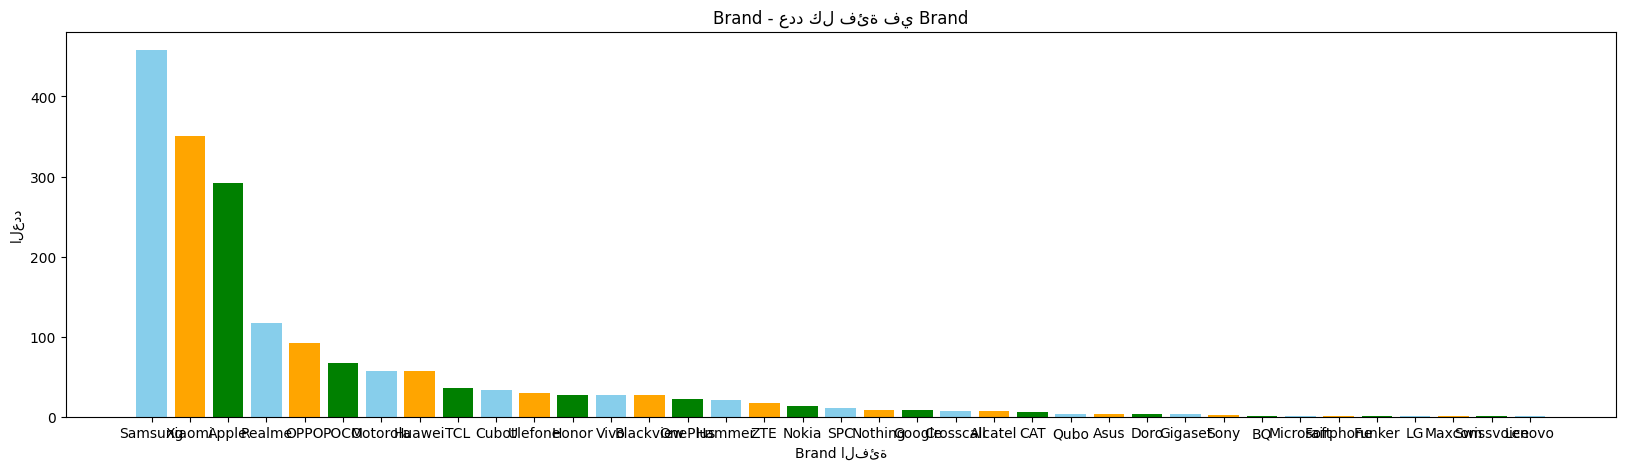

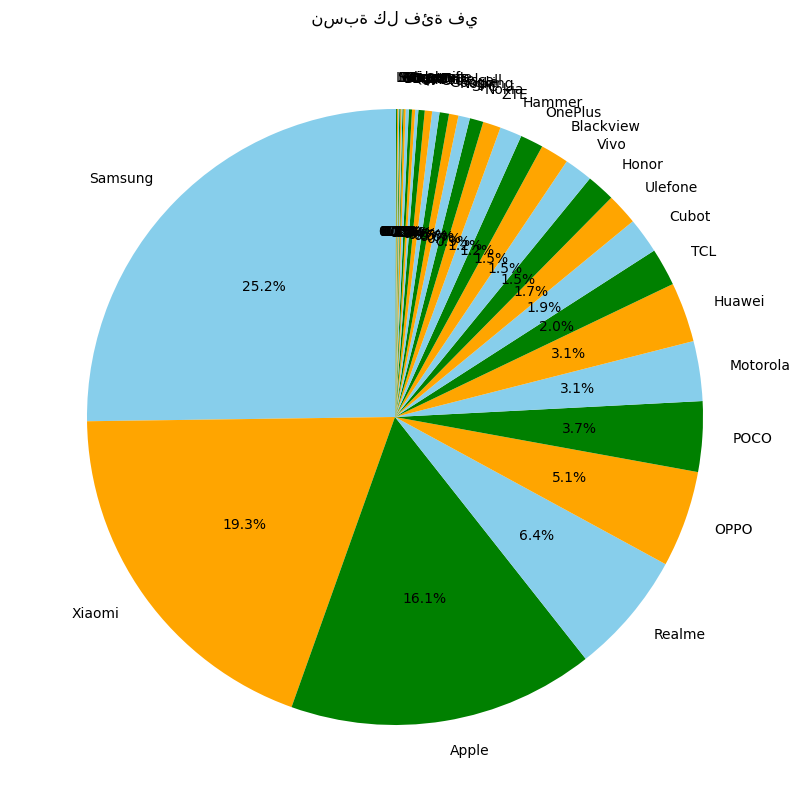

In [162]:
# -------------------------------
# إعداد البيانات للرسم البياني
# -------------------------------
category_counts = df['Brand'].value_counts()  # عدد كل فئة في العمود Category

# -------------------------------
# 1️⃣ رسم بياني عمودي (Bar Chart)
# -------------------------------
plt.figure(figsize=(20,5))
plt.bar(category_counts.index, category_counts.values, color=['skyblue','orange','green'])
plt.title('Brand - عدد كل فئة في Brand')
plt.xlabel('Brand الفئة')
plt.ylabel('العدد')
plt.show()

# -------------------------------
# 2️⃣ رسم بياني دائري (Pie Chart)
# -------------------------------
plt.figure(figsize=(10,10))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue','orange','green'], startangle=90)
plt.title(' نسبة كل فئة في ')
plt.show()

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [164]:
print(len(df))

1816


In [165]:
df_copy = df.copy()

# حذف اللون لانه غير مهم في السعر غالبا

In [166]:
df.drop(columns=['Color'], inplace=True, errors='ignore')
df.head()

,Smartphone,Brand,Model,RAM,Storage,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,Yes,799.00


<h1>حساب عدد التكرار لكل من الهواتف والموديل و اسم الشركة<h1>

In [167]:
# نحسب عدد التكرارات لكل موديل
counts = df['Model'].value_counts()

# نحتفظ بالموديلات اللي تكرارها 7 أو أكثر
models_to_keep = counts[counts >= 7].index

# نصفي البيانات
df_filtered = df[df['Model'].isin(models_to_keep)]

# نحسب عدد التكرارات لكل موديل
counts = df['Smartphone'].value_counts()

# نحتفظ بالموديلات اللي تكرارها 7 أو أكثر
models_to_keep = counts[counts >= 7].index

# نصفي البيانات
df_filtered = df[df['Brand'].isin(models_to_keep)]

# نحتفظ بالموديلات اللي تكرارها 7 أو أكثر
models_to_keep = counts[counts >= 7].index

# نصفي البيانات
df_filtered = df[df['Brand'].isin(models_to_keep)]

# نقوم بتحويل ال free الى صفر وواحد (الواحد نعم والصفر لا )

In [168]:
# تحويل Yes إلى 1 و No إلى 0
df['Free'] = df['Free'].map({'Yes': 1, 'No': 0})

# التأكد من التحويل
print(df.head())


                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage  Free  Final Price  
0   8.0    256.0     1       231.60  
1   4.0    128.0     1       279.00  
2   4.0    128.0     1       179.01  
3   6.0    128.0     1       279.99  
4  12.0    512.0     1       799.00  


In [169]:
df.shape

(1816, 7)

# التاكد من التكرار

In [170]:
df_filtered.head()

df_filtered["Smartphone"].value_counts()

df_filtered["Brand"].value_counts()


Series([], Name: count, dtype: int64)

In [171]:
#تأكد من التكرارات الكاملة (Duplicated Rows):
df_filtered = df_filtered.drop_duplicates()

 بحل القيم الفارغة في الرام و التخزين قلنا تكون القيم محدوده والقيم الفراغة بالقيمه المتوسطة

In [172]:
# قائمة القيم المسموحة
allowed_ram = [2, 4, 8, 16, 32]

# إيجاد القيمة الأكثر شيوعًا في العمود بعد تجاهل القيم غير المسموحة وNaN
most_common = df.loc[df['RAM'].isin(allowed_ram), 'RAM'].mode()[0]

# تنظيف البيانات: نحتفظ بالقيم المسموحة، والباقي نبدله بالأكثر شيوعًا
df['RAM'] = df['RAM'].apply(lambda x: x if x in allowed_ram else most_common)


# قائمة القيم المسموحة للتخزين (GB)
allowed_storage = [16, 32, 64, 128, 256, 512, 1024]

# إيجاد القيمة الأكثر شيوعًا ضمن القيم المسموحة
most_common_storage = df.loc[df['Storage'].isin(allowed_storage), 'Storage'].mode()[0]

# تنظيف البيانات: نخلي القيم المسموحة كما هي، والباقي نبدله بالأكثر شيوعًا
df['Storage'] = df['Storage'].apply(lambda x: x if x in allowed_storage else most_common_storage)


# عرض القيم
# استعلام على العمودين RAM و Storage
ram_storage = df[['RAM', 'Storage']]

# عرض القيم
print(ram_storage)

      RAM  Storage
0     8.0    256.0
1     4.0    128.0
2     4.0    128.0
3     8.0    128.0
4     8.0    512.0
...   ...      ...
1811  4.0     64.0
1812  4.0    128.0
1813  4.0    128.0
1814  4.0     64.0
1815  8.0    128.0

[1816 rows x 2 columns]


# حصرنا السعر يكون اكبر من  50 واقل من 2000

In [173]:
# أعلى قيمة
max_price = df['Final Price'].max()

# أقل قيمة
min_price = df['Final Price'].min()

print("أعلى قيمة:", max_price)
print("أقل قيمة:", min_price)

# الاحتفاظ فقط بالقيم الطبيعية للهواتف
df = df[(df['Final Price'] >= 50) & (df['Final Price'] <= 2000)]


# عرض القيم
df['Final Price']

أعلى قيمة: 2271.28
أقل قيمة: 60.46


0       231.60
1       279.00
2       179.01
3       279.99
4       799.00
         ...  
1811    249.01
1812    200.00
1813    269.00
1814    211.00
1815    289.00
Name: Final Price, Length: 1811, dtype: float64

# التكرار الي اقل من خمسة يحذف

In [174]:
# افترض أن عمود اسم الهاتف اسمه 'Phone Name'

# تحديد الحد الأقصى للتكرار، مثلاً 10 مرات
max_repeats = 5

# إيجاد عدد التكرارات لكل هاتف
counts = df['Smartphone'].value_counts()

# الاحتفاظ بالصفوف التي تكرار اسم الهاتف فيها <= max_repeats
df_filtered = df[df['Smartphone'].isin(counts[counts <= max_repeats].index)]


In [175]:
print(len(df))

1811


In [176]:
# التحقق من القيم الفارغة
print(df.isnull().sum())

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Free           0
Final Price    0
dtype: int64


# رسم الانماط

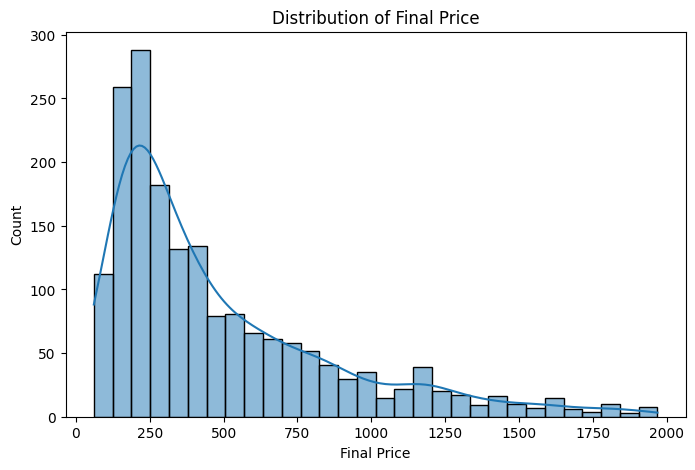

In [177]:
# الجزء 8: توزيع السعر النهائي
plt.figure(figsize=(8,5))
sns.histplot(df['Final Price'], bins=30, kde=True)
plt.title("Distribution of Final Price")
plt.xlabel("Final Price")
plt.ylabel("Count")
plt.show()

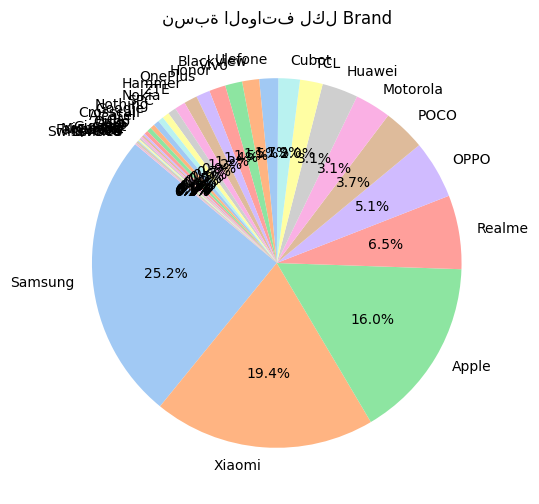

In [178]:
# -------------------------------
# Pie Chart – نسبة الهواتف لكل Brand
# -------------------------------
brand_counts = df_filtered['Brand'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('نسبة الهواتف لكل Brand')
plt.show()


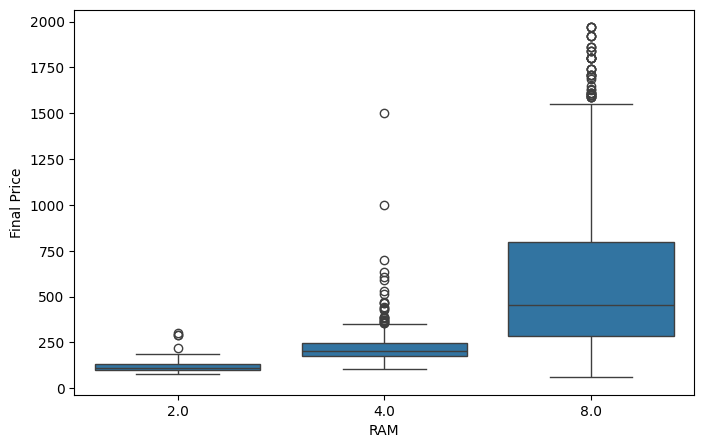

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x='RAM', y='Final Price', data=df_filtered)
plt.show()

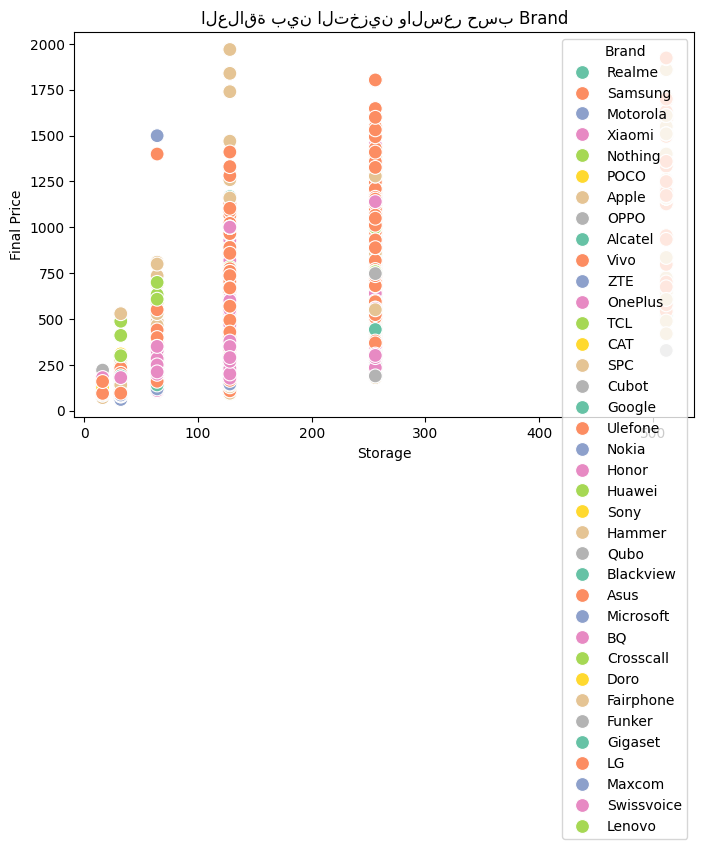

In [180]:
# -------------------------------
# Scatter Plot – العلاقة بين Storage وFinal Price
# -------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x='Storage', y='Final Price', hue='Brand', data=df_filtered, palette='Set2', s=100)
plt.title('العلاقة بين التخزين والسعر حسب Brand')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6548\2507829037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Final Price', data=df_filtered, palette='coolwarm')


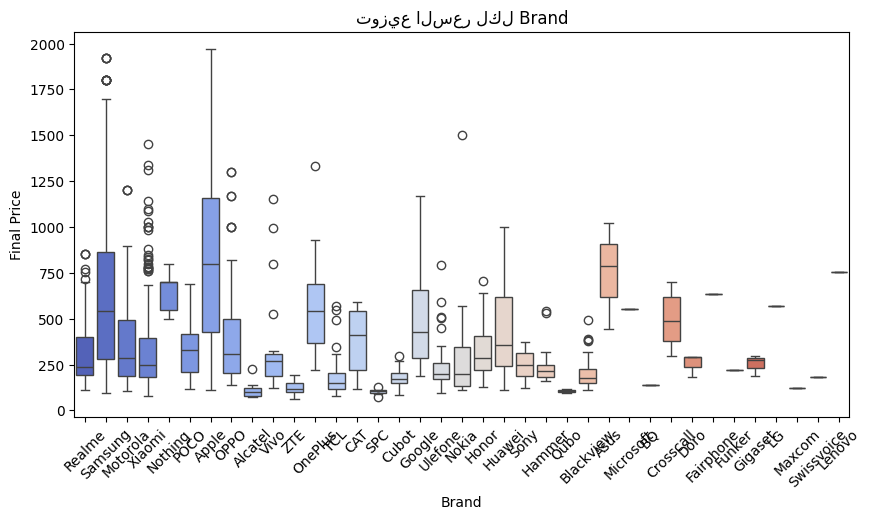

In [181]:
# -------------------------------
#Box Plot – توزيع السعر لكل Brand
# -------------------------------
plt.figure(figsize=(10,5))
sns.boxplot(x='Brand', y='Final Price', data=df_filtered, palette='coolwarm')
plt.title('توزيع السعر لكل Brand')
plt.xticks(rotation=45)
plt.show()


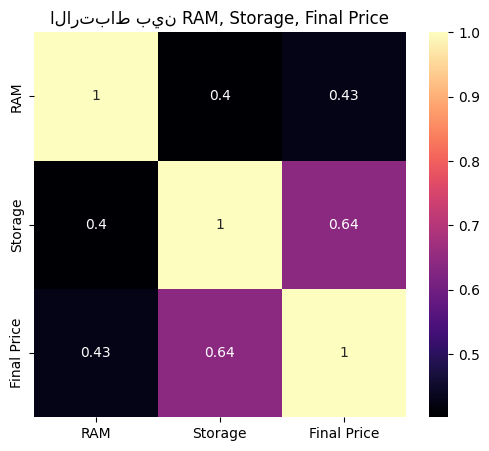

In [182]:
# -------------------------------
# Heatmap – الارتباط بين الخصائص الرقمية
# -------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(df_filtered[['RAM','Storage','Final Price']].corr(), annot=True, cmap='magma')
plt.title('الارتباط بين RAM, Storage, Final Price')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_6548\1593229718.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Storage', data=df_filtered, palette='Set3', order=df_filtered['Storage'].value_counts().index)


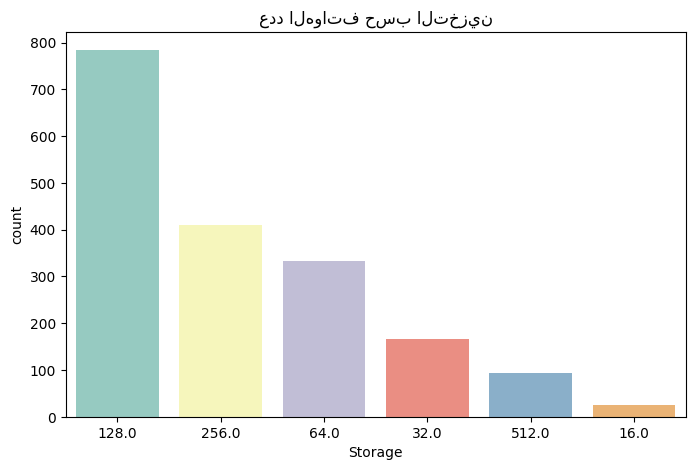

In [183]:
# -------------------------------
# 7️⃣ Count Plot – عدد الهواتف حسب Storage
# -------------------------------
plt.figure(figsize=(8,5))
sns.countplot(x='Storage', data=df_filtered, palette='Set3', order=df_filtered['Storage'].value_counts().index)
plt.title('عدد الهواتف حسب التخزين')
plt.show()

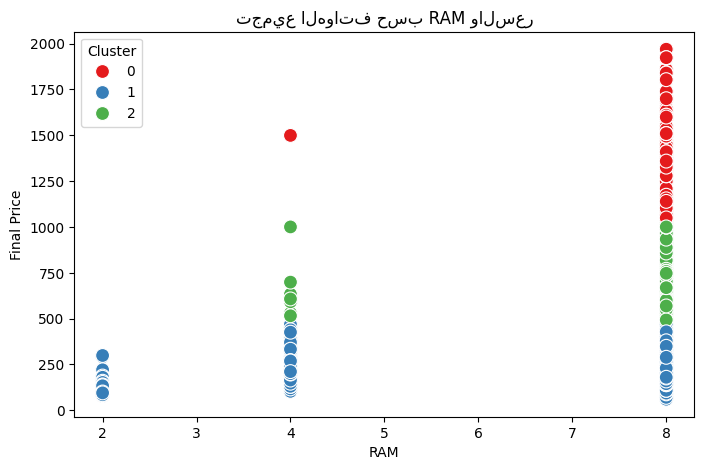

In [184]:
#مكرر
# -------------------------------
# 8️⃣ Cluster Scatter – تجميع حسب RAM وFinal Price
# -------------------------------
X_cluster = df_filtered[['RAM','Final Price']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
df_filtered['Cluster'] = kmeans.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(x='RAM', y='Final Price', hue='Cluster', data=df_filtered, palette='Set1', s=100)
plt.title('تجميع الهواتف حسب RAM والسعر')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_6548\2026660657.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Brand', y='Final Price', hue='Storage', data=df_filtered, ci=None, palette='Paired')


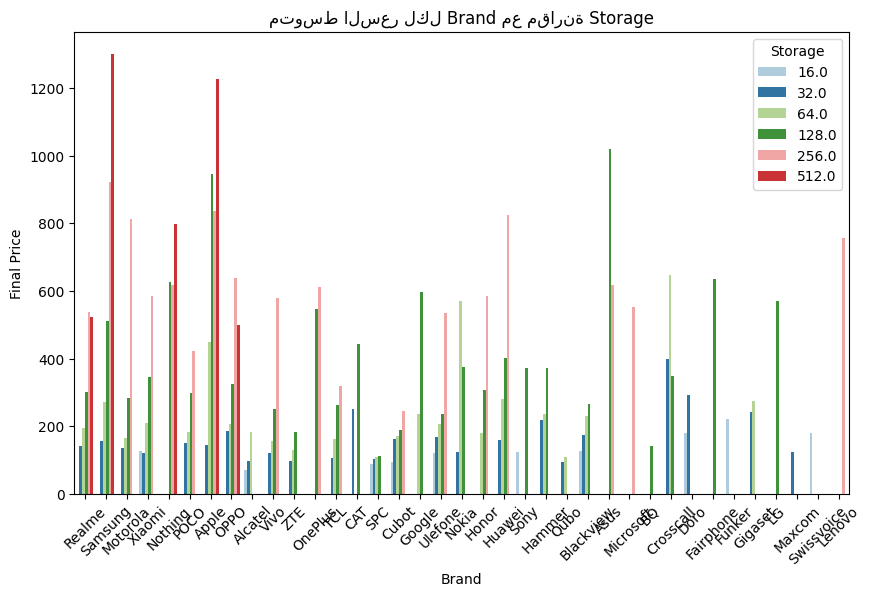

In [185]:
# -------------------------------
# 9️⃣ Bar Comparison – متوسط السعر لكل Brand وStorage
# -------------------------------
plt.figure(figsize=(10,6))
sns.barplot(x='Brand', y='Final Price', hue='Storage', data=df_filtered, ci=None, palette='Paired')
plt.title('متوسط السعر لكل Brand مع مقارنة Storage')
plt.xticks(rotation=45)
plt.show()


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

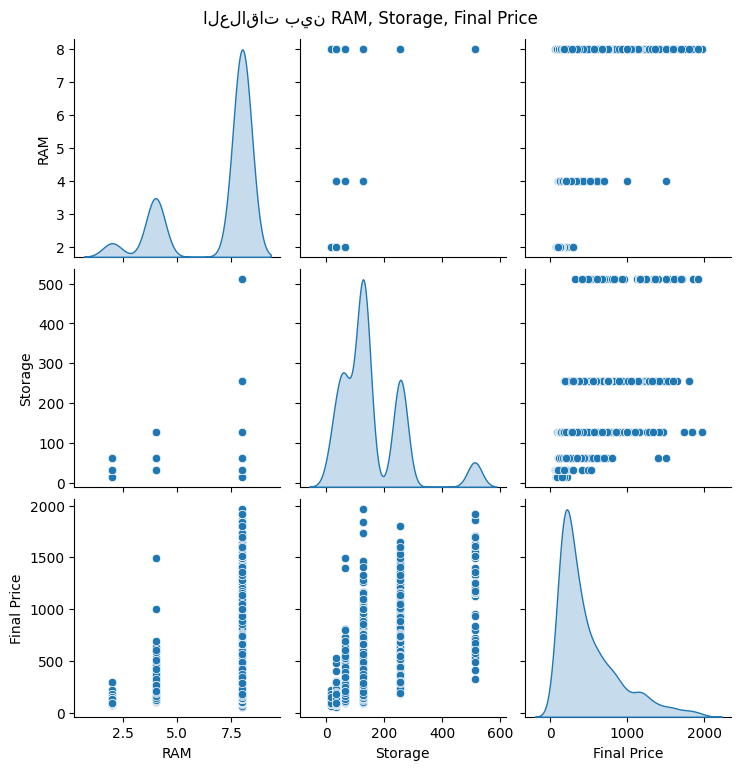

In [186]:
# -------------------------------
# 🔟 Pairplot – علاقة جميع المتغيرات الرقمية
# -------------------------------
sns.pairplot(df_filtered[['RAM','Storage','Final Price']], kind='scatter', diag_kind='kde', palette='Set2')
plt.suptitle('العلاقات بين RAM, Storage, Final Price', y=1.02)
plt.show()

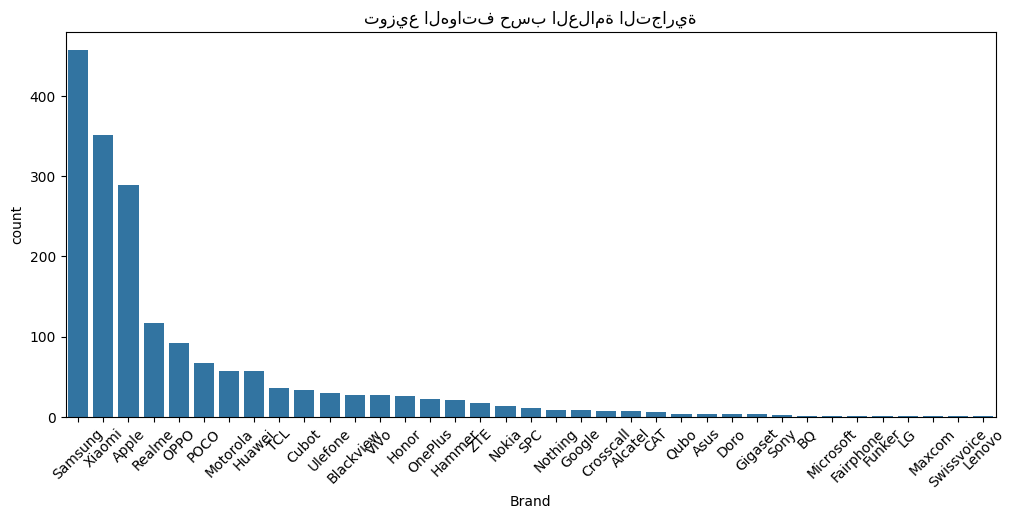

In [187]:

# Descriptive – وصفية (ماذا حدث؟)

# الهدف: فهم البيانات ووصفها
# مثال عملي: توزيع عدد الهواتف لكل Brand أو موديل
plt.figure(figsize=(12,5))
# توزيع عدد الهواتف لكل Brand
sns.countplot(data=df_filtered, x='Brand', order=df_filtered['Brand'].value_counts().index)
plt.title('توزيع الهواتف حسب العلامة التجارية')
plt.xticks(rotation=45)
plt.show()


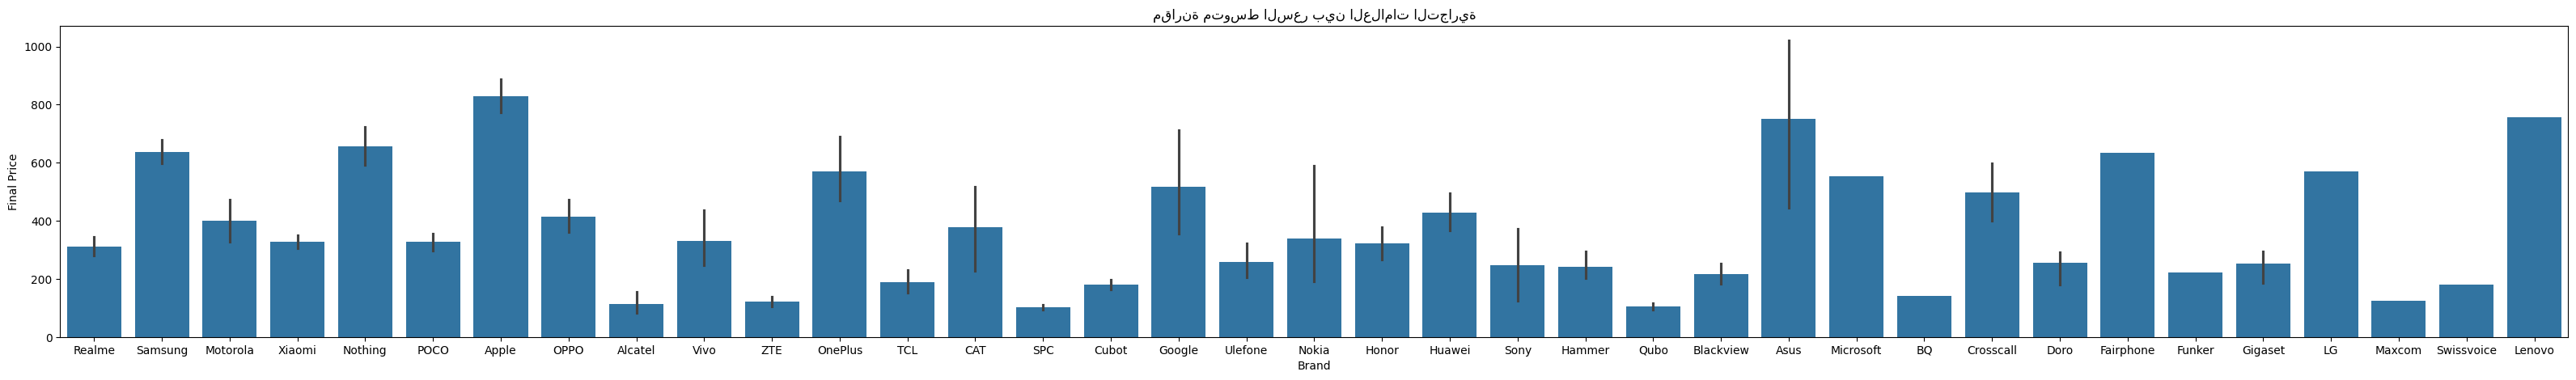

In [188]:
#  Comparative – مقارنة (أيهما أفضل أو أسوأ؟)

# الهدف: مقارنة مجموعات أو فترات
# مثال عملي: مقارنة متوسط السعر لكل Brand
plt.figure(figsize=(40,5))
sns.barplot(x='Brand', y='Final Price', data=df_filtered)
plt.title('مقارنة متوسط السعر بين العلامات التجارية')
plt.show()

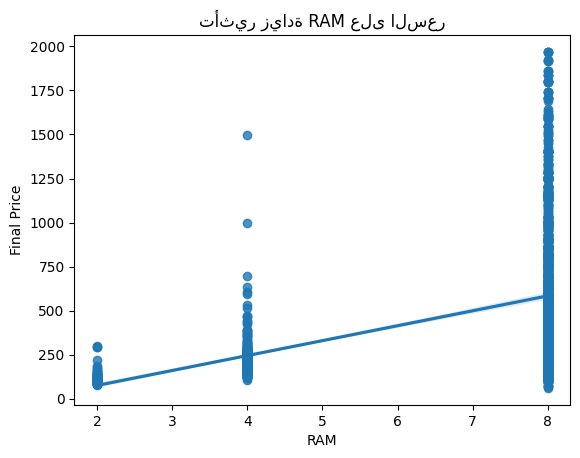

In [189]:
sns.regplot(x='RAM', y='Final Price', data=df_filtered)
plt.title('تأثير زيادة RAM على السعر')
plt.show()

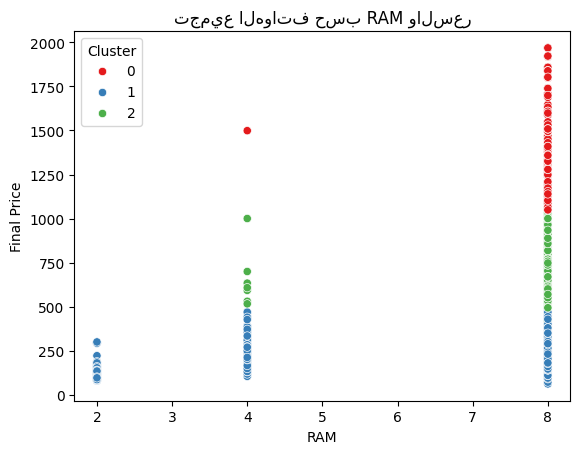

In [190]:
# 8️⃣ Clusters – التجميع

# الهدف: تجميع الهواتف حسب الخصائص

from sklearn.cluster import KMeans
X_cluster = df_filtered[['RAM','Storage','Final Price']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_cluster)
df_filtered['Cluster'] = kmeans.labels_

sns.scatterplot(x='RAM', y='Final Price', hue='Cluster', data=df_filtered, palette='Set1')
plt.title('تجميع الهواتف حسب RAM والسعر')
plt.show()

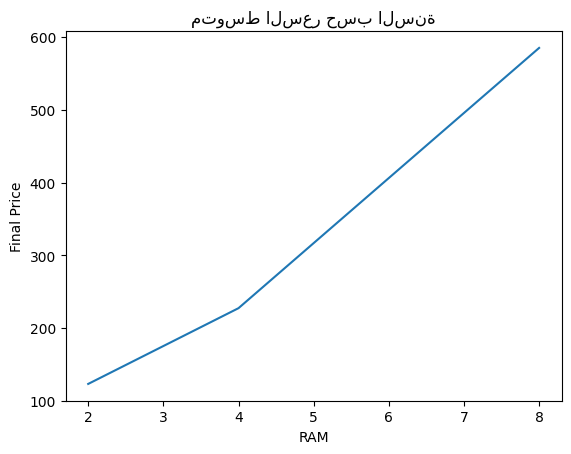

In [191]:
# 9️⃣ Temporal / Trend – زمنية

# الهدف: تتبع التغيرات على الزمن
# مثال عملي: لو عندك بيانات سنة الإصدار أو تاريخ البيع

sns.lineplot(x='RAM', y='Final Price', data=df_filtered.groupby('RAM')['Final Price'].mean().reset_index())
plt.title('متوسط السعر حسب السنة')
plt.show()

الاستخدام مقارنة بالرام:
 RAM
8.0    1343
4.0     380
2.0      88
Name: count, dtype: int64


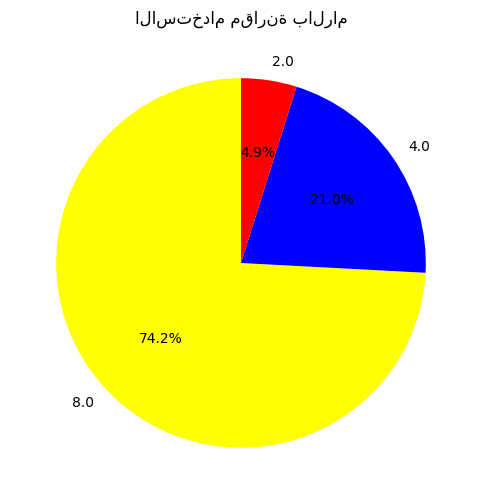

In [192]:
gender_count = df["RAM"].value_counts()
print("الاستخدام مقارنة بالرام:\n", gender_count)

plt.figure(figsize=(6,6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=["yellow", "blue","red"], startangle=90)
plt.title("الاستخدام مقارنة بالرام")
plt.show()

In [193]:
df.drop(columns=["Model"], inplace=True, errors='ignore')
df.drop(columns=["Brand"], inplace=True, errors='ignore')


In [194]:
# الجزء 10: حفظ نسخة بعد المعالجة
df.to_csv("smartphones_processedقبل الترقيم جديد.csv", index=False)
print("تم حفظ نسخة البيانات بعد المعالجة باسم: smartphones_processed.csv")

تم حفظ نسخة البيانات بعد المعالجة باسم: smartphones_processed.csv


# التدريب 

In [195]:
print(df.dtypes)

Smartphone      object
RAM            float64
Storage        float64
Free             int64
Final Price    float64
dtype: object


In [196]:
from sklearn.preprocessing import LabelEncoder

# le_brand = LabelEncoder()
# df['Brand'] = le_brand.fit_transform(df['Brand'])

le_smartphone = LabelEncoder()
df['Smartphone'] = le_smartphone.fit_transform(df['Smartphone'])

# le_model = LabelEncoder()
# df['Model'] = le_model.fit_transform(df['Model'])

# لو عمود Free نصي
le_free = LabelEncoder()
df['Free'] = le_free.fit_transform(df['Free'])


In [197]:
print(df.dtypes)

Smartphone       int64
RAM            float64
Storage        float64
Free             int64
Final Price    float64
dtype: object


In [198]:
# X: جميع الأعمدة ماعدا PriceCategory
X = df.drop(['Final Price'], axis=1)

# y: الفئة
y = df['Final Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# -------------------------------
#  بناء نموذج Random Forest
# -------------------------------

# إنشاء نموذج التنبؤ بالسعر كرقم
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# تدريب النموذج
rf.fit(X_train, y_train)
# -------------------------------
#  التنبؤ على مجموعة الاختبار
# -------------------------------
y_pred = rf.predict(X_test)

# -------------------------------
# حساب الدقة كنسبة مئوية
# -------------------------------
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2*100:.2f}%")

from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse*100:.2f}%")


r2 = r2_score(y_test, y_pred)
print(f"R²: {r2*100:.2f}%")


R²: 83.28%
RMSE: 16768.11%
R²: 83.28%


In [199]:
# تقسيم Final Price إلى ثلاث فئات
bins = [50, 500, 1000, df['Final Price'].max()]  # مثال على حدود الفئات
labels = ['رخيص', 'متوسط', 'غالي']

df['PriceCategory'] = pd.cut(df['Final Price'], bins=bins, labels=labels, include_lowest=True)


# عرض النتائج للتأكد
df[['Final Price', 'PriceCategory']].head(10)

,Final Price,PriceCategory
0,231.60,رخيص
1,279.00,رخيص
2,179.01,رخيص
3,279.99,رخيص
4,799.00,متوسط
5,148.52,رخيص
6,699.00,متوسط
7,352.59,رخيص
8,279.00,رخيص
9,329.99,رخيص


In [200]:
# X: جميع الأعمدة ماعدا PriceCategory
X = df.drop(['PriceCategory', 'Final Price'], axis=1)

# y: الفئة
y = df['PriceCategory']


In [201]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:
# -------------------------------
#  بناء نموذج Random Forest
# -------------------------------

rf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42 )
rf.fit(X_train, y_train)

# -------------------------------
#  التنبؤ على مجموعة الاختبار
# -------------------------------
y_pred = rf.predict(X_test)

# -------------------------------
# حساب الدقة كنسبة مئوية
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"الدقة: {accuracy*100:.2f}%")

الدقة: 87.88%


In [203]:
# 3️⃣ عدد الأشجار
print("عدد الأشجار في الغابة:", len(rf.estimators_))

# 4️⃣ حساب أعماق كل شجرة
tree_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

print("أعماق الأشجار:", tree_depths)
print("أكبر عمق:", max(tree_depths))
print("أصغر عمق:", min(tree_depths))
print("المتوسط:", sum(tree_depths) / len(tree_depths))

عدد الأشجار في الغابة: 100
أعماق الأشجار: [23, 19, 21, 24, 20, 18, 22, 18, 22, 21, 29, 20, 21, 17, 21, 19, 19, 24, 18, 19, 20, 19, 19, 26, 19, 19, 23, 20, 21, 19, 20, 17, 21, 19, 22, 22, 20, 21, 18, 18, 25, 18, 17, 20, 18, 21, 19, 18, 18, 19, 19, 19, 20, 20, 21, 22, 24, 18, 18, 19, 18, 18, 22, 23, 20, 19, 19, 17, 22, 21, 17, 17, 22, 19, 21, 20, 18, 20, 20, 20, 23, 21, 19, 17, 19, 25, 21, 18, 19, 20, 17, 21, 18, 21, 20, 21, 20, 19, 22, 19]
أكبر عمق: 29
أصغر عمق: 17
المتوسط: 20.04


In [204]:
importances = rf.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.2f}")

# هذه الخطوة تبين لك أي الأعمدة أكثر تأثير على سعر الهاتف.

Smartphone: 0.74
RAM: 0.09
Storage: 0.16
Free: 0.01


In [205]:
# الجزء 10: حفظ نسخة بعد المعالجة
df.to_csv("smartphones_processedجديد.csv", index=False)
print("تم حفظ نسخة البيانات بعد المعالجة باسم: smartphones_processed.csv")

تم حفظ نسخة البيانات بعد المعالجة باسم: smartphones_processed.csv


In [206]:
# pip install category_encoders


In [207]:
# # -*- coding: utf-8 -*-
# # مشروع تنقيب البيانات – الهواتف الذكية

# # 1️⃣ استيراد المكتبات الأساسية
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from category_encoders import TargetEncoder
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.cluster import KMeans

# # -------------------------------
# # 2️⃣ تحميل البيانات
# # -------------------------------
# df = pd.read_csv("smartphones.csv")

# # -------------------------------
# # 3️⃣ تنظيف البيانات
# # -------------------------------
# # حذف اللون لأنه غير مهم غالباً
# df.drop(columns=['Color'], inplace=True, errors='ignore')

# # الاحتفاظ بالقيم الطبيعية للـ RAM
# allowed_ram = [2, 4, 8, 16, 32]
# most_common_ram = df.loc[df['RAM'].isin(allowed_ram), 'RAM'].mode()[0]
# df['RAM'] = df['RAM'].apply(lambda x: x if x in allowed_ram else most_common_ram)

# # الاحتفاظ بالقيم الطبيعية للتخزين
# allowed_storage = [16, 32, 64, 128, 256, 512, 1024]
# most_common_storage = df.loc[df['Storage'].isin(allowed_storage), 'Storage'].mode()[0]
# df['Storage'] = df['Storage'].apply(lambda x: x if x in allowed_storage else most_common_storage)

# # الاحتفاظ فقط بالأسعار الطبيعية
# df = df[(df['Final Price'] >= 50) & (df['Final Price'] <= 2000)]

# # حذف الصفوف المكررة
# df = df.drop_duplicates()

# # -------------------------------
# # 4️⃣ استكشاف البيانات بالرسومات
# # -------------------------------
# # توزيع عدد الهواتف لكل Brand
# plt.figure(figsize=(12,5))
# sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
# plt.title('توزيع الهواتف حسب العلامة التجارية')
# plt.xticks(rotation=45)
# plt.show()

# # Boxplot للسعر حسب RAM
# plt.figure(figsize=(8,5))
# sns.boxplot(x='RAM', y='Final Price', data=df)
# plt.title("توزيع السعر حسب RAM")
# plt.show()

# # Scatter Plot بين Storage و Final Price حسب Brand
# plt.figure(figsize=(8,5))
# sns.scatterplot(x='Storage', y='Final Price', hue='Brand', data=df, palette='Set2', s=100)
# plt.title('العلاقة بين التخزين والسعر حسب Brand')
# plt.show()

# # Heatmap للارتباط بين الخصائص الرقمية
# plt.figure(figsize=(6,5))
# sns.heatmap(df[['RAM','Storage','Final Price']].corr(), annot=True, cmap='magma')
# plt.title('الارتباط بين RAM, Storage, Final Price')
# plt.show()

# # -------------------------------
# # 5️⃣ Feature Engineering
# # -------------------------------
# # Feature Interaction: RAM * Storage
# df['RAM_Storage'] = df['RAM'] * df['Storage']

# # Target Encoding للـ Smartphone
# target_enc = TargetEncoder(cols=['Smartphone'])
# df['Smartphone_TE'] = target_enc.fit_transform(df['Smartphone'], df['Final Price'])

# # ترميز Free
# le_free = LabelEncoder()
# df['Free'] = le_free.fit_transform(df['Free'])

# # -------------------------------
# # 6️⃣ تقسيم Final Price إلى فئات
# # -------------------------------
# bins = [50, 500, 1000, df['Final Price'].max()]
# labels = ['رخيص', 'متوسط', 'غالي']
# df['PriceCategory'] = pd.cut(df['Final Price'], bins=bins, labels=labels, include_lowest=True)

# # -------------------------------
# # 7️⃣ إعداد X و y
# # -------------------------------
# X = df[['Smartphone_TE','RAM','Storage','RAM_Storage','Free']]
# y = df['PriceCategory']

# # تقسيم البيانات
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# # -------------------------------
# # 8️⃣ بناء نموذج Gradient Boosting
# # -------------------------------
# gb = GradientBoostingClassifier(
#     n_estimators=300,
#     learning_rate=0.05,
#     max_depth=4,
#     random_state=42
# )
# gb.fit(X_train, y_train)

# # التنبؤ على مجموعة الاختبار
# y_pred = gb.predict(X_test)

# # -------------------------------
# # 9️⃣ تقييم النموذج
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # مصفوفة الالتباس
# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
# plt.title("Confusion Matrix")
# plt.ylabel("الحقيقة")
# plt.xlabel("التنبؤ")
# plt.show()

# # -------------------------------
# # 10️⃣ حفظ نسخة بعد المعالجة
# # -------------------------------
# df.to_csv("smartphones_processed_final.csv", index=False)
# print("تم حفظ نسخة البيانات بعد المعالجة باسم: smartphones_processed_final.csv")


In [208]:
# # الجزء 10: حفظ نسخة بعد المعالجة
# df.to_csv("smartphones_processedجديد.csv", index=False)
# print("تم حفظ نسخة البيانات بعد المعالجة باسم: smartphones_processed.csv")

In [209]:
# clf = DecisionTreeClassifier (class_weight='balanced', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print(classification_report(y_test, y_pred))

# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")


In [210]:
# # -------------------------------
# # 1️⃣ بناء نموذج Logistic Regression
# # -------------------------------
# logreg = LogisticRegression( class_weight='balanced',max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)


# # -------------------------------
# # 2️⃣ التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred = logreg.predict(X_test)

# # -------------------------------
# # 3️⃣ حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")


In [211]:
# # -------------------------------
# # 1️⃣ بناء نموذج KNN
# # -------------------------------
# knn = KNeighborsClassifier(n_neighbors=5)  # يمكنك تعديل عدد الجيران
# knn.fit(X_train, y_train)

# # -------------------------------
# # 2️⃣ التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred = knn.predict(X_test)

# # -------------------------------
# # 3️⃣ حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")


In [212]:

# # -------------------------------
# # بناء نموذج SVM
# # -------------------------------
# svm_model = SVC(kernel='linear', random_state=42)  # kernel يمكن تغييره إلى 'rbf' حسب الحاجة
# svm_model.fit(X_train, y_train)

# # -------------------------------
# # التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred_svm = svm_model.predict(X_test)

# # -------------------------------
# # حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred_svm)
# print(f"الدقة (SVM): {accuracy*100:.2f}%")


In [213]:
# # افترض أن النماذج السابقة تم تدريبها: dtree, logreg, rf, knn, svm_model
# # التنبؤ لكل نموذج
# models = {
#     'Decision Tree': clf,
#     'Logistic Regression': logreg,
#     'Random Forest': rf,
#     'KNN': knn,
#     'SVM': svm_model
# }

# results = []

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     accuracy = accuracy_score(y_test, y_pred)
#     results.append({
#         'Model': name,
#         'Accuracy': accuracy*100,
#         'Precision': report['weighted avg']['precision'],
#         'Recall': report['weighted avg']['recall'],
#         'F1-score': report['weighted avg']['f1-score']
#     })

# # تحويل النتائج إلى DataFrame
# results_df = pd.DataFrame(results)
# print(results_df)

# # رسم بياني لمقارنة Accuracy
# plt.figure(figsize=(8,5))
# sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set2')
# plt.title("مقارنة الدقة بين النماذج")
# plt.ylabel("Accuracy (%)")
# plt.ylim(0, 100)
# plt.show()


In [214]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [215]:
# # -------------------------------
# # 1️⃣ بناء نموذج Logistic Regression
# # -------------------------------
# logreg = LogisticRegression( class_weight='balanced',max_iter=1000, random_state=42)
# logreg.fit(X_train, y_train)


# # -------------------------------
# # 2️⃣ التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred = logreg.predict(X_test)

# # -------------------------------
# # 3️⃣ حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")

# # -------------------------------
# # 4️⃣ إنشاء مصفوفة الالتباس
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix (مصفوفة الالتباس):\n", cm)

# # -------------------------------
# # 5️⃣ رسم مصفوفة الالتباس
# # -------------------------------
# plt.figure(figsize=(6,4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Logistic Regression")
# plt.show()

# # -------------------------------
# # 6️⃣ تقرير التصنيف لكل فئة
# # -------------------------------
# print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [216]:

# # -------------------------------
# # 1️⃣ بناء نموذج Random Forest
# # -------------------------------
# rf = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # -------------------------------
# # 2️⃣ التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred = rf.predict(X_test)

# # -------------------------------
# # 3️⃣ حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")

# # -------------------------------
# # 4️⃣ مصفوفة الالتباس
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - Random Forest")
# plt.show()

# # -------------------------------
# # 5️⃣ تقرير التصنيف لكل فئة
# # -------------------------------
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # -------------------------------
# # 6️⃣ أهمية الخصائص (Feature Importance)
# # -------------------------------
# feature_importances = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': rf.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# print("\nFeature Importance:\n", feature_importances)

# # رسم أهمية الخصائص
# plt.figure(figsize=(8,6))
# sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
# plt.title("Feature Importance - Random Forest")
# plt.show()


In [217]:
# # -------------------------------
# # 1️⃣ بناء نموذج KNN
# # -------------------------------
# knn = KNeighborsClassifier(n_neighbors=5)  # يمكنك تعديل عدد الجيران
# knn.fit(X_train, y_train)

# # -------------------------------
# # 2️⃣ التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred = knn.predict(X_test)

# # -------------------------------
# # 3️⃣ حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred)
# print(f"الدقة: {accuracy*100:.2f}%")

# # -------------------------------
# # 4️⃣ مصفوفة الالتباس
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - KNN")
# plt.show()

# # -------------------------------
# # 5️⃣ تقرير التصنيف لكل فئة
# # -------------------------------
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [218]:

# # -------------------------------
# # بناء نموذج SVM
# # -------------------------------
# svm_model = SVC(kernel='linear', random_state=42)  # kernel يمكن تغييره إلى 'rbf' حسب الحاجة
# svm_model.fit(X_train, y_train)

# # -------------------------------
# # التنبؤ على مجموعة الاختبار
# # -------------------------------
# y_pred_svm = svm_model.predict(X_test)

# # -------------------------------
# # حساب الدقة كنسبة مئوية
# # -------------------------------
# accuracy = accuracy_score(y_test, y_pred_svm)
# print(f"الدقة (SVM): {accuracy*100:.2f}%")

# # -------------------------------
# # مصفوفة الالتباس
# # -------------------------------
# cm = confusion_matrix(y_test, y_pred_svm)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix - SVM")
# plt.show()

# # -------------------------------
# # تقرير التصنيف لكل فئة
# # -------------------------------
# print("\nClassification Report (SVM):\n", classification_report(y_test, y_pred_svm))


In [219]:
# # افترض أن النماذج السابقة تم تدريبها: dtree, logreg, rf, knn, svm_model
# # التنبؤ لكل نموذج
# models = {
#     'Decision Tree': clf,
#     'Logistic Regression': logreg,
#     'Random Forest': rf,
#     'KNN': knn,
#     'SVM': svm_model
# }

# results = []

# for name, model in models.items():
#     y_pred = model.predict(X_test)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     accuracy = accuracy_score(y_test, y_pred)
#     results.append({
#         'Model': name,
#         'Accuracy': accuracy*100,
#         'Precision': report['weighted avg']['precision'],
#         'Recall': report['weighted avg']['recall'],
#         'F1-score': report['weighted avg']['f1-score']
#     })

# # تحويل النتائج إلى DataFrame
# results_df = pd.DataFrame(results)
# print(results_df)

# # رسم بياني لمقارنة Accuracy
# plt.figure(figsize=(8,5))
# sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set2')
# plt.title("مقارنة الدقة بين النماذج")
# plt.ylabel("Accuracy (%)")
# plt.ylim(0, 100)
# plt.show()
